In [1]:
from __future__ import absolute_import
from __future__ import print_function

import os
import datetime
from shutil import copyfile

In [2]:
from utils import import_test_configuration, set_sumo, set_test_path, set_train_path
from fixed_time import *

from generator import TrafficGenerator
from visualization import Visualization

In [3]:



if __name__ == "__main__":
    config = import_test_configuration(config_file='testing_settings.ini')
    sumo_cmd = set_sumo(config['gui'], config['sumocfg_file_name'], config['max_steps'])
#     model_path, plot_path = set_test_path(config['models_path_name'], config['model_to_test'])
    plot_path = set_train_path(config['models_path_name'])
    
    
    #PARAMETERS
    fixed_green_time = 30
    scenario_number = 0
    
    
    
    TrafficGen = TrafficGenerator(
        config['max_steps'], 
        config['n_cars_generated'],
        config['penetration_rate']
    )
    
    
    Visualization = Visualization(
        plot_path, 
        dpi=96
    )
    
    
    Simulation = FixedTimeTestSimulation(
        TrafficGen,
        sumo_cmd,
        config['max_steps'],
        fixed_green_time,
        config['yellow_duration'],
        config['num_actions'],
        scenario_number
    )
    
    
    print('\n----- Test episode')
    simulation_time = Simulation.run(config['episode_seed'])  # run the simulation
    print('Simulation time:', simulation_time, 's')

    print("----- Testing info saved at:", plot_path)

    copyfile(src='testing_settings.ini', dst=os.path.join(plot_path, 'testing_settings.ini'))

#     Visualization.save_data_and_plot(data=Simulation.reward_episode, filename='reward', xlabel='Action step', ylabel='Reward')
    Visualization.save_data_and_plot(data=Simulation.queue_length_episode, filename='queue', xlabel='Step', ylabel='Queue lenght (vehicles)')

    


----- Test episode
Simulating...
Simulation time: 35.5 s
----- Testing info saved at: C:\Users\Chantal\Documents\Deep-QLearning-Agent-for-Traffic-Signal-Control\TLCS\models\model_182\


In [21]:
queue = open("C:/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/TLCS/models/model_177/plot_queue_data.txt").readlines()



85



0 5400


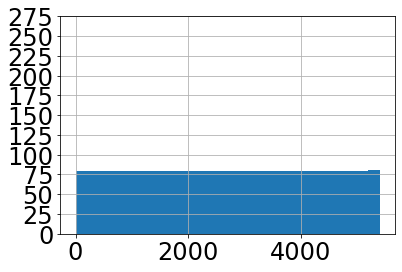

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

# timings = np.random.uniform(0,5400, 1000)
# timings = np.random.weibull(2, 1000)

timings = np.linspace(0, 5400, num=2000)
# print(len(timings))
# print(timings)
timings = np.sort(timings)

# reshape the distribution to fit the interval 0:max_steps
car_gen_steps = []
min_old = math.floor(timings[0])
max_old = math.ceil(timings[-1])

print(min_old, max_old)

min_new = 0
max_new = 5400
for value in timings:
    car_gen_steps = np.append(car_gen_steps, ((max_new - min_new) / (max_old - min_old)) * (value - max_old) + max_new)

car_gen_steps = np.rint(car_gen_steps)  # round every value to int -> effective steps when a car will be generated

# print(car_gen_steps)

plt.figure()
plt.hist(car_gen_steps, bins = 25)
# plt.yticks(np.arange(0, 25, 3))
plt.yticks(np.arange(0, 300, 25))
plt.grid()
# plt.plot(queue)

plt.show()

In [39]:
print(car_gen_steps)

[ 124.  137.  137.  167.  182.  187.  193.  198.  199.  200.  206.  208.
  211.  221.  229.  232.  238.  239.  241.  251.  254.  261.  266.  267.
  270.  273.  274.  289.  295.  297.  301.  302.  315.  325.  334.  336.
  347.  347.  353.  354.  355.  367.  376.  382.  383.  386.  387.  389.
  393.  394.  394.  397.  405.  413.  416.  417.  418.  419.  419.  433.
  434.  442.  442.  445.  453.  454.  455.  455.  456.  462.  475.  481.
  482.  482.  489.  497.  498.  501.  523.  527.  529.  537.  537.  539.
  539.  546.  547.  548.  555.  559.  561.  568.  571.  571.  576.  578.
  579.  581.  581.  583.  589.  594.  596.  597.  598.  603.  603.  604.
  610.  615.  619.  619.  623.  623.  629.  631.  632.  635.  638.  638.
  640.  643.  644.  645.  646.  647.  647.  647.  647.  652.  653.  654.
  657.  658.  659.  662.  666.  667.  668.  669.  674.  675.  676.  681.
  682.  682.  682.  691.  697.  698.  698.  699.  699.  700.  702.  704.
  708.  708.  708.  711.  718.  719.  719.  720.  7

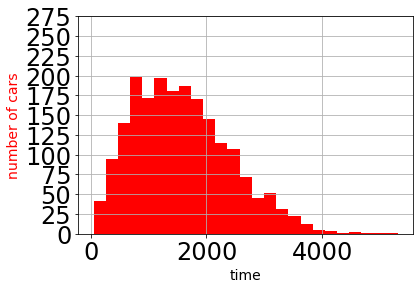

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt

# timings = np.random.uniform(0,5400, 1000)
timings = np.random.weibull(2, 2000)

# timings = np.linspace(0, 5400, num=7000)
# print(len(timings))
# print(timings)
timings = np.sort(timings)

# reshape the distribution to fit the interval 0:max_steps
car_gen_steps = []
min_old = math.floor(timings[0])
max_old = math.ceil(timings[-1])


min_new = 0
max_new = 5400
for value in timings:
    car_gen_steps = np.append(car_gen_steps, ((max_new - min_new) / (max_old - min_old)) * (value - max_old) + max_new)

car_gen_steps = np.rint(car_gen_steps)  # round every value to int -> effective steps when a car will be generated


#-------plotting





fig,ax = plt.subplots()

ax.hist(car_gen_steps, bins = 25, color ='red')
# # set x-axis label
ax.set_xlabel("time",fontsize=14)
# # set y-axis label
ax.set_ylabel("number of cars",color="red",fontsize=14)
plt.yticks(np.arange(0, 300, 25))
plt.grid()
plt.show()

# twin object for two different y-axis on the sample plot
# ax2=ax.twinx()
# ax2.plot(queue,color="blue")
# ax2.set_ylabel("queue length",color="blue",fontsize=14)
# plt.show()




In [80]:
print(int(len(car_gen_steps)/2))

print(car_gen_steps[int(len(car_gen_steps)/2)])

1250
1494.0
